In [2]:
import numpy as np
from numpy.linalg import norm, det
from numpy import arccos, dot

import matplotlib.pyplot as plt

# Linear Algebra

To start the math unit, I am going to tackle my largest gap in knowledge: Linear Algebra. I attempted to take Linear Algebra but dropped the class. Luckily, my book https://pythonnumericalmethods.berkeley.edu/notebooks/chapter14.00-Linear-Algebra-and-Systems-of-Linear-Equations.html has a chapter dedicated to talking about it.

I intend to just work my way through the chapters and take notes as I go.

## Vectors
Vectors are a 1 dimensional, n-long set of real numbers. Alternatively, they can be stated to be an n-tuple of the set of real numbers.

Unless stated, you can assume that a vector is a column vector. 

You can transpose a vector to swap its major order i.e. turn a row vector into a column vector.

In [7]:
vec_row = np.array([[1,2,3,4,5]])
vec_col = np.array([[6],
                  [7],
                  [8],
                  [9],
                  [10]])
vec_col_diff = np.array([1,2,3,4,5])
print(vec_row.shape)
print(vec_col.shape)
print(vec_col_diff.shape)

(1, 5)
(5, 1)
(5,)


It is worth noting that the row vector has a shape of 1 x N, and the column vector has a shape of N x 1.

vec_col_diff is worth pointing out because of its resemblance to vec_col,  but its shape is not the same.


## Norms
Norms are all basically length calculations, but depending on what type of norm they are, they have different behaviors.

L2 norms are the ones most understandable as they are basically euclidean distance.
They're computed with this formula: 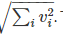

L1 norms are based off of straight lines. It's sometimes called Manhattan distance or taxicab distance. Here is its formula: 

As a final note, here is an image showing the difference:
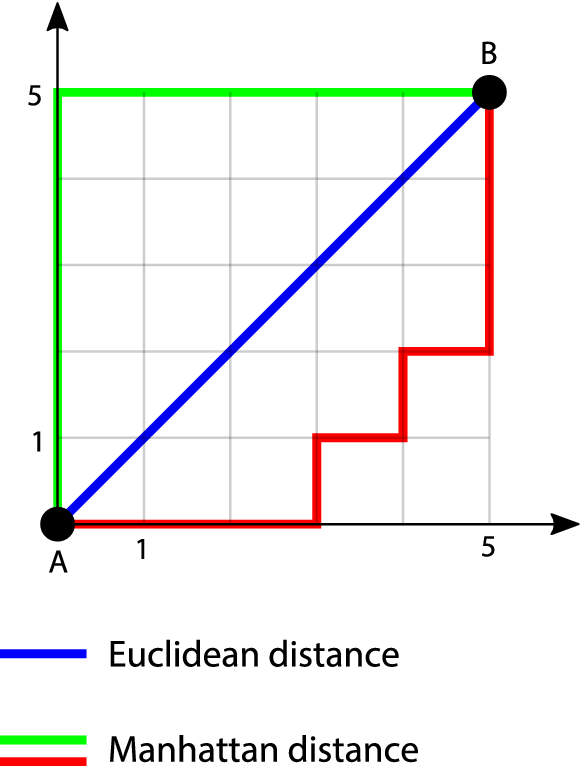


There is also the L (inf) which is equal to the maximum absolute value in the vector

Numpy allows the user to do these normalization methods through the **norm** function from **numpy.linalg**

In [10]:
# Simple case, using the graph above
vector = np.array([5,5])
l1 = norm(vector,1)
l2 = norm(vector,2)

print("L1:",l1,"\nL2",l2)

L1: 10.0 
L2 7.0710678118654755


# Vector Operations
## Vector Addition 
Achieved with just piece wise addition of each element in the vectors.i.e. <1,2,3>+<1,2,3>=<2,4,6>

## Multiplication
Multiplication is a bit more obscure as it has multiple definitions on how it can be done.

### Scalar Multiplication
This is the easiest multiplication in my eyes. Say you have a scalar value like 3 and a vector <2,4,6>. The result of scalar multiplication would be 3\*2 + 3 \*4 + 6\*3 = 36

### Dot Product Multiplication
Dot product is simple as well. You multiply each element of the two equally sized arrays and then add them up. Here's a general formula 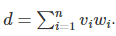

You can determine the angle between two vectors using this formula (which involves the dot product)


I never really had this explanation of what a dot product is, but my book defines them as "measure of how similarly directed the two vectors are".


In [26]:

v = np.array([[3, 3]])
w = np.array([[2, 2]]) # These lines are parallel
theta =arccos(dot(v,w.T)/(norm(v)*norm(w))) #  the .T transpose the array
print(theta)

v = np.array([[-2,2]]) # perpendiculat
theta =arccos(dot(v,w.T)/(norm(v)*norm(w))) #  the .T transpose the array
print(theta)

[[0.]]
[[1.57079633]]


## Cross Products
A cross product geometrically represents a vector perpendicular to the two vectors with length equal to the area enclosed by the parallelogram created by the two vectors.
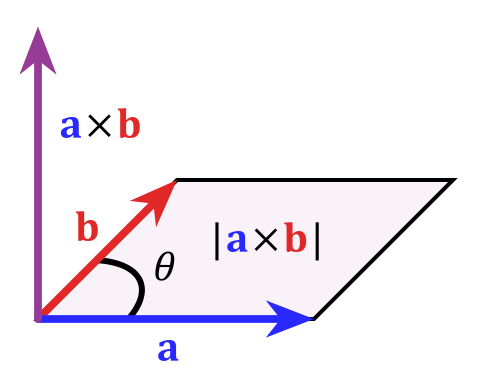


You can calculate them two ways that I know of:
They were always confusing to me if solved using this formula: 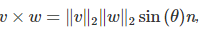

I've always preferred using the method where you take the determinants of a matrix instead (definitely not my handwriting) :
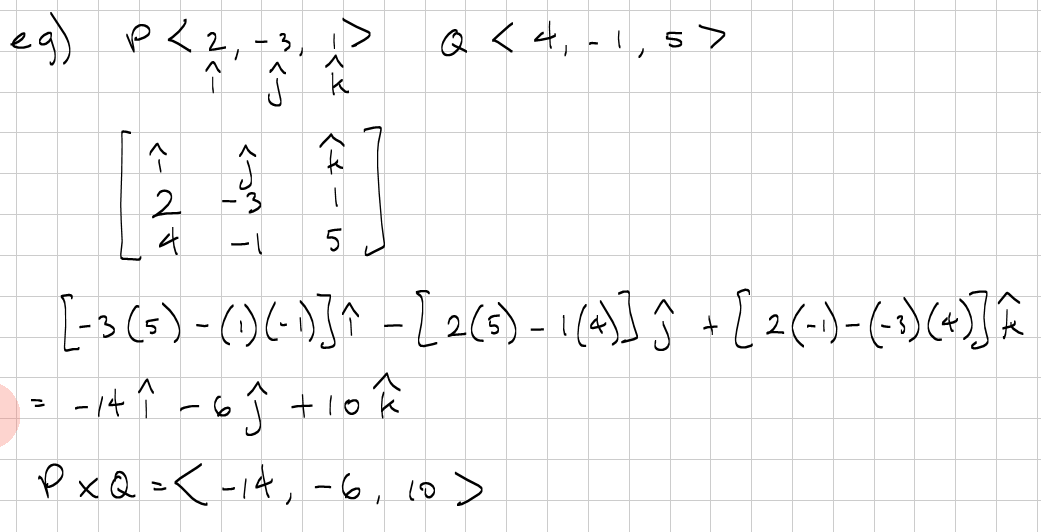

In [27]:
v = np.array([[0, 2, 0]])
w = np.array([[3, 0, 0]])
print(np.cross(v, w))

[[ 0  0 -6]]


# Matrices

## Matrix Terminology
Matrix mulitplication is defined when P is m x p and Q is a p x n, and M=PQ which is of dimension m x n. 

p is defined as the **inner matrix dimension** q is defined as the **outer matrix dimensions**.

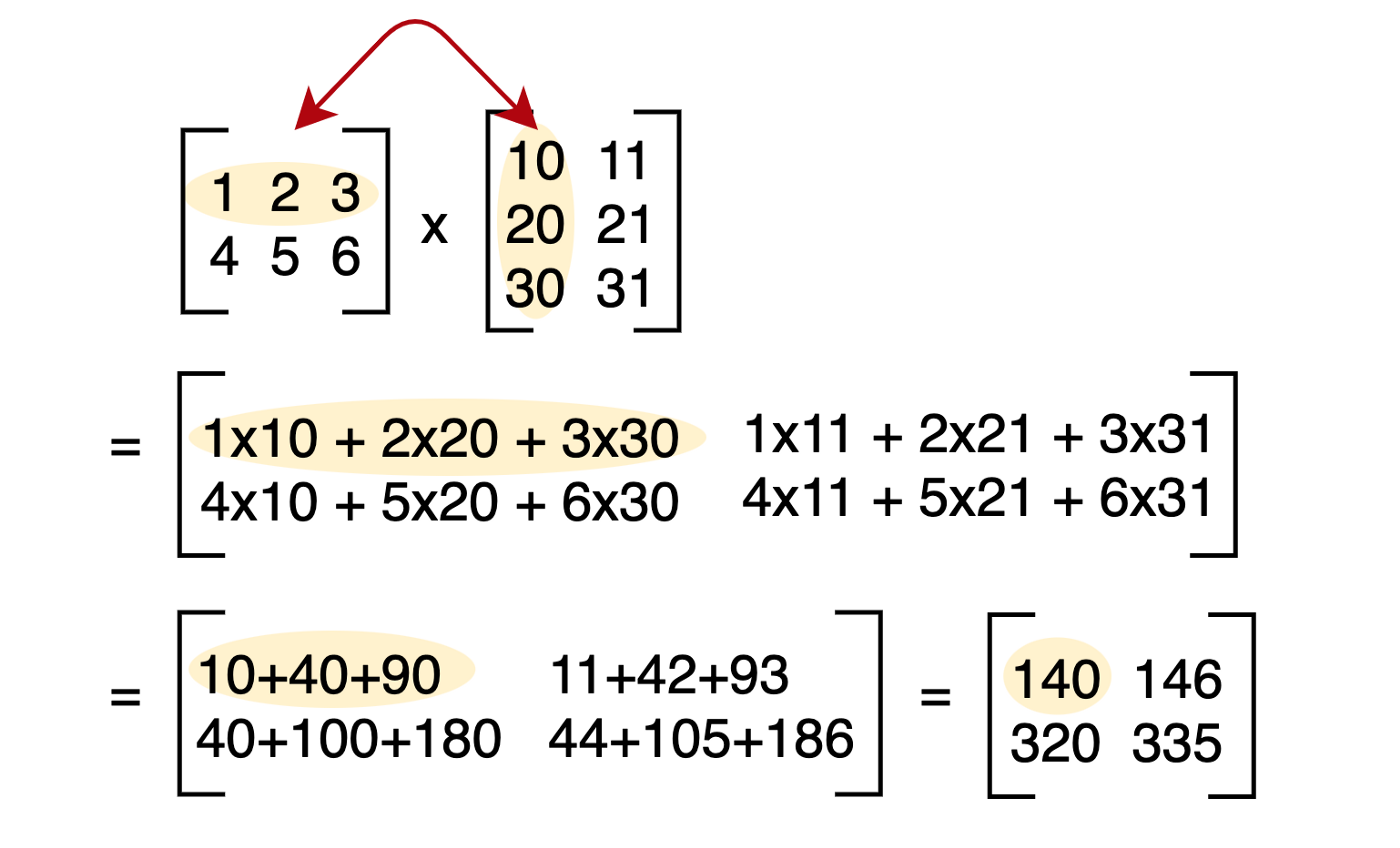

The type of multiplication in numpy depends on the method used. np.dot will do matrix multiplication, while * will attempt to do piece by piece scalar multiplication.

**Note to self: Remember that matrix multiplication is essentially just a dot product of each row by each column**

In [34]:
P = np.array([[1, 7], [2, 3], [5, 0]])
Q = np.array([[2, 6, 3, 1], [1, 2, 3, 4]])
print(P)
print(Q)
print("Matrix multiplication",np.dot(P, Q))


[[1 7]
 [2 3]
 [5 0]]
[[2 6 3 1]
 [1 2 3 4]]
Matrix multiplication [[ 9 20 24 29]
 [ 7 18 15 14]
 [10 30 15  5]]


In [35]:
# Won't work because * is just piece wise multiplication
res = P * Q

ValueError: operands could not be broadcast together with shapes (3,2) (2,4) 

In [36]:
# Will work...effectively just squaring
res = P*P
res

array([[ 1, 49],
       [ 4,  9],
       [25,  0]])

## Transpose
The **Transpose** of a matrix is basically a matrix that has reversed the positions of its rows and its columns. If you transpose a matrix, you essentially turn it from being a row based matrix to a column based one, or vice versa

You can use .T method of a numpy array to quickly get its Transpose.

This seems like it would be very useful to know if I am working with linking Python to Fortran code

In [4]:
P = np.array([[1, 7], [2, 3], [5, 0]])
Q = np.array([[2, 6, 3, 1], [1, 2, 3, 4]])
print(P)
print(Q)
print("Transposing the matrices...")
print(P.T) 
print(Q.T)

[[1 7]
 [2 3]
 [5 0]]
[[2 6 3 1]
 [1 2 3 4]]
Transposing the matrices...
[[1 2 5]
 [7 3 0]]
[[2 1]
 [6 2]
 [3 3]
 [1 4]]


## Determinant


I've never quite understood "what" a determinant represents, but I've calculated them before. I know it will only work for a square matrix. As a refresher, here is the formula:
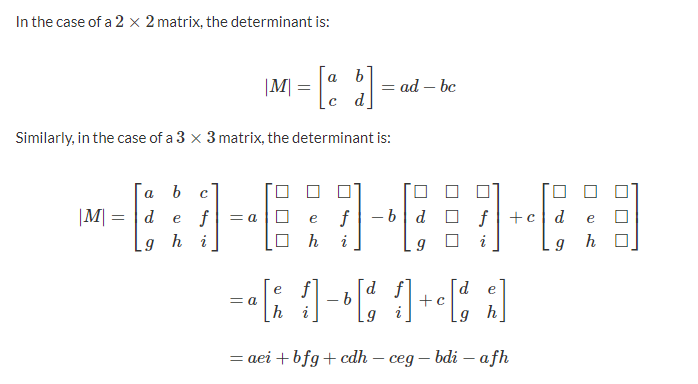

A few properties of the determinant: 
* !=0 means it is an invertible matrix
* The determinant of a product of matrices is the product of their determinants
* They show up in complex math like Jacobian Matrices

Another example:
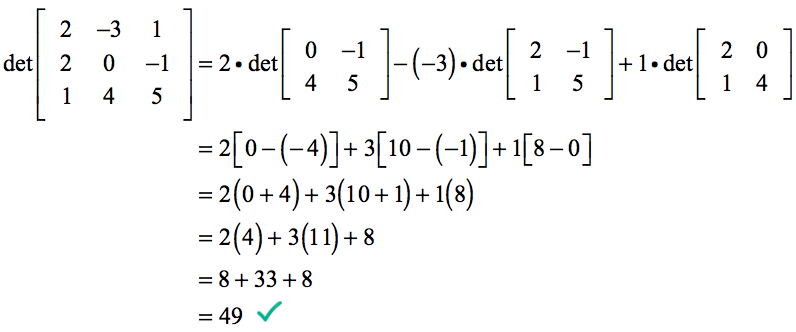


In [6]:
# Same as above
P = np.array([[2,-3,1], [2,0,-1], [1,4,5]])
print(det(P))

49.000000000000014
